# Kaggle Disaster Tweets Competition 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import LSTM, Dense, Flatten, MaxPooling1D, Embedding, Dropout 
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import np_utils 

from collections import Counter
from keras.models import Sequential 
from keras.preprocessing.text import Tokenizer


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import StratifiedKFold
from bert_serving.client import BertClient
from nltk.stem import WordNetLemmatizer


In [2]:
data = pd.read_csv("/Users/jessicaparker/Downloads/nlp-getting-started/train.csv")

In [19]:
!pip install wordcloud

     |████████████████████████████████| 163kB 48kB/s eta 0:00:01


In [3]:
x = data["text"].astype(str)
y = list(data["target"])

In [4]:
stop_words = set(stopwords.words('english')) 


def remove_stopwords(text):
    tokenized = word_tokenize(text)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    lemmatized_string = "".join(lemmatized)
    return lemmatized

def tokenize(text):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)
    sequences = tokenizer.texts_to_sequences(text)
    return sequences

In [5]:
x_nostop = x.map(remove_stopwords)
lemmatized = x_nostop.apply(lemmatize)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lemmatized)
sequences = tokenizer.texts_to_sequences(lemmatized)
padded = pad_sequences(sequences, padding='post')
X = padded
#y = np.array(y)
X.shape

(7613, 70)

In [27]:
lemmatized_string = str(lemmatized)


str

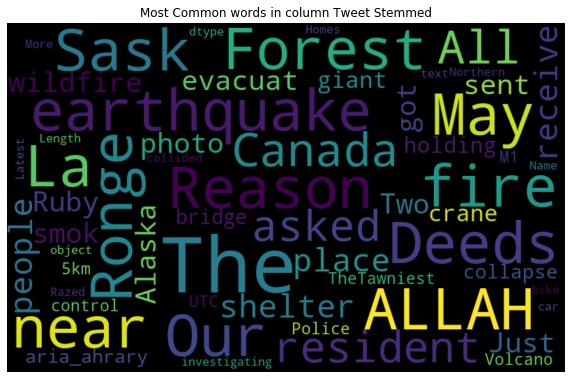

In [28]:
all_words = lemmatized_string
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Most Common words in column Tweet Stemmed")
plt.show()

In [6]:
y = np.array(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [8]:
X_train.shape

(5709, 70)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn. import RamdomizedSeach 

log_model = LogisticRegression()

log_model.fit(X_train, y_train)
log_model.score(X_test,y_test)

/Users/jessicaparker/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6003151260504201

In [42]:
prediction = log_model.predict(X_test)

In [46]:
Counter(prediction)

Counter({0: 1396, 1: 508})